## First regressions to predict tomorrows dow closing price

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


In [13]:
df = pd.read_csv('sentiment_thru_DJ_no_news')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Adj Close,sentiment_all,sentiment1_10,close_tomorrow,ME_count,DJ_count
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,-0.048568,-0.097258,11782.349609,7,0
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,0.121956,0.103081,11642.469727,2,0
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,-0.046530,-0.118056,11532.959961,2,2


In [16]:
df['change_in_close'] = df['close_tomorrow'] - df['Close']

In [66]:
df.head(2)
df.to_csv('change_in_close')

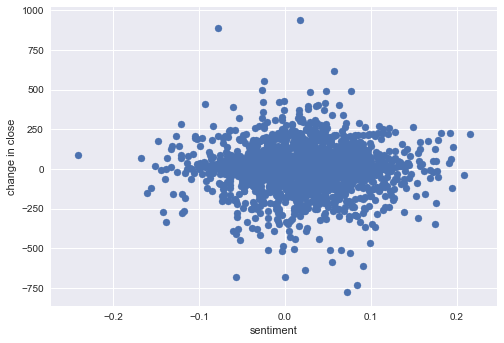

In [38]:
plt.scatter(x=df.sentiment_all, y=df.change_in_close)
plt.xlabel('sentiment')
plt.ylabel('change in close')
plt.show()

# So theres no correlation at all really....might be smart to make this a classification problem
### will create column where 1 signifies increase in DJIA, 0 signifies decrease

In [43]:
change = df['change_in_close']

In [45]:
change_array = [] 
for i in range(len(change)):
    if change[i] > 0:
        change_array.append(1)
    else:
        change_array.append(0)

In [47]:
len(change_array)

1989

In [48]:
change_array = pd.DataFrame(change_array)

In [56]:
change_array = change_array.rename(columns={0:'binary_change'})

In [59]:
df = df.join(change_array)

In [61]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close,sentiment_all,sentiment1_10,close_tomorrow,ME_count,DJ_count,change_in_close,binary_change
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,-0.048568,-0.097258,11782.349609,7,0,48.029297,1
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,0.121956,0.103081,11642.469727,2,0,-139.879882,0


In [62]:
df.drop('change_in_close', axis=1, inplace=True)

In [64]:
df.drop('close_tomorrow', axis=1, inplace=True)

In [65]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,sentiment_all,sentiment1_10,ME_count,DJ_count,binary_change
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,-0.048568,-0.097258,7,0,1
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,0.121956,0.103081,2,0,0
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,-0.046530,-0.118056,2,2,0
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0.011398,0.020679,4,0,1
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.040677,-0.028030,1,0,1


In [67]:
df.to_csv('binary_change')

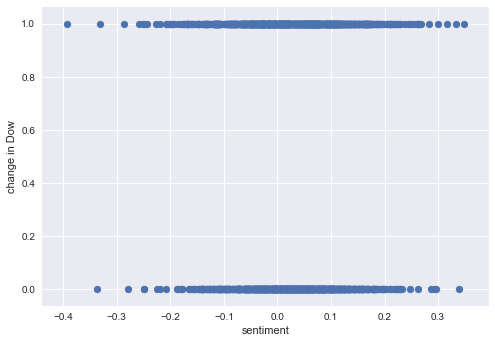

In [69]:
plt.scatter(x=df.sentiment1_10,y=df.binary_change)
plt.xlabel('sentiment')
plt.ylabel('change in Dow')
plt.show()

In [7]:
import pandas as pd
data = pd.read_csv('stocknews/DJIA_table.csv')

In [9]:
data.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
